In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format
import matplotlib.pyplot as plt
import string
import random

# Downloading NLP library (nltk, gensim, reg-ex, word cloud)
import re
from gensim.utils import simple_preprocess
from gensim.models import LdaMulticore
import gensim.corpora as corpora
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [22]:
df600 = pd.read_csv("merged_and_cleaned600.csv", sep = ",").drop(columns = ["Unnamed: 0"])

In [24]:
df600

,URL,Duration,info,action,understand,ARI,FleshReadingEase,Kincaid,active_verb,has_description,...,topicIds,comment_total_words,postive_comment_count,keyword_title_cosine,comment_description_cosine,comment_unique_words,keyword_decription_cosine,neutral_comment_count,negative_comment_count,comment_title_cosine
0,-32U9eU1hdM,310,1.00,0,1,14.52,28.51,13.75,59.00,1.00,...,NaN,290.00,14.00,0.00,2.53,257.00,0.02,4.00,4.00,0.71
1,-71ld0iqAq8,602,1.00,0,1,9.06,52.87,8.75,31.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
2,-8HmZjScLe0,732,0.00,0,0,21.83,70.67,10.03,42.00,1.00,...,NaN,"3,603.00",90.00,0.28,3.22,"2,789.00",0.00,5.00,5.00,2.46
3,-Aj5BTnz-v0,559,1.00,1,1,15.78,25.99,13.21,23.00,1.00,...,NaN,261.00,9.00,0.28,1.23,234.00,0.02,6.00,3.00,0.45
4,-IaysvX1L8U,246,1.00,0,1,12.51,45.13,11.97,16.00,1.00,...,NaN,104.00,3.00,0.19,0.27,95.00,0.04,1.00,1.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,zLbAxztnnfE,163,0.00,0,0,19.30,19.81,16.74,77.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
617,zPdwsCTp4gM,751,1.00,0,1,8.49,65.03,7.58,6.00,1.00,...,NaN,70.00,1.00,0.47,0.09,54.00,0.00,0.00,1.00,0.00
618,zU-5GcqzHNM,819,1.00,1,1,16.95,62.72,12.56,17.00,1.00,...,NaN,"5,239.00",47.00,0.07,8.14,"3,715.00",0.14,17.00,36.00,3.46
619,z_3S2_41_FE,300,1.00,0,1,9.27,75.98,7.75,32.00,1.00,...,NaN,"2,684.00",38.00,0.00,8.46,"2,178.00",0.18,33.00,29.00,5.21


# Topic Modelling

In [2]:
df600 = pd.read_csv("merged_and_cleaned600.csv", sep = ",").drop(columns = ["Unnamed: 0"])
df600 = df600[df600["subtitle"] != "[]"]

# TODO: Remove transition words 
stopword_lst = list(set(stopwords.words('english'))) 
stopword_lst += ["nof","nthe", "one", "thing", "quot"]

colloquial = ["see","going","know"]
stopword_lst += colloquial

In [3]:
# Create a function to perform topic modelling. 
# TODO: Ask if there's any word we should remove from the caption
# NOTE: Problems with cleanText.
def cleanText(text, stopword_lst, return_string = False):
    """
    @param text: A string of text to clean by removing punctuations, stopwords, and splitting bad tails.
    @param stopword_lst: A list of words we wish to remove. Usually used the list of stopwords in nltk + sth.
    @param return_string: A Boolean indicating we want to return a list of words or a long string. 
    Return: A list of keywords for each sentence
    NOTE: Use return_string = True for word cloud; False for topic modelling (bag of words).
    """
    text_lst = str(text).split("\\n") # Youtube subtitle denotes lines as \\n, so cannot directly remove punctuations.
    temp = []
    # Create a list of words for each video's subtitle, excluding all stopwords. 
    for text in text_lst:
        temp += [word for word in simple_preprocess(text, deacc=True) if word not in stopword_lst]
    # For word cloud or topic modelling.
    if return_string:
        return ' '.join(temp)
    return temp

def generateWordCloud(df, col_name):
    """
    @param df: A dataframe whose column consists of texts we want to clean
    @param col_name: A string of column name whose value is a text we want to clean. 
    Usage: Generate a word cloud showing the most frequent words appearing in columns of text.
    NOTE: To generate a word cloud for a specific video, simply index by conditions,
    such as video_id, channel creator, understandable, actionable, etc.
    """
    assert col_name in df.columns.tolist()
    # Pre-process the text into long string.
    text = ""
    for video_subtitle in df[col_name].tolist():
        text += cleanText(video_subtitle, stopword_lst, return_string = True) 
        
    # Generate a word cloud
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)
    # Visualize a word cloud
    wordcloud.to_image()
    plt.figure(figsize = (9,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def topicModelling():
    # Create corpora of words
    pass

In [4]:
# Building a bag of subtitles for each video
# See https://radimrehurek.com/gensim/corpora/dictionary.html
# See https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

temp = df600[df600["info"] == 1]["subtitle"]
# Create a list of words for each video subtitle. 
subtitle_lst = [cleanText(subtitle, stopword_lst, return_string = False) for subtitle in temp]
# Convert each word into dictionary. This allows us to perform mapping in the future.
id2word = corpora.Dictionary(subtitle_lst)
# Build a corpus in term document frequency
corpus = [id2word.doc2bow(subtitle) for subtitle in subtitle_lst]

# number of topics
num_topics = 3
# Build LDA model
lda_model = LdaMulticore(corpus=corpus,id2word=id2word, num_topics=num_topics)

In [6]:
# Print the Keyword in the topics
# Possible interpretation: Different aspects of diabetes.
# Word counts on two classes
for i in range(len(lda_model.print_topics())):
    print(lda_model.print_topics()[i])

(0, '0.008*"blood" + 0.008*"diabetes" + 0.007*"insulin" + 0.006*"glucose" + 0.005*"like" + 0.004*"get" + 0.004*"also" + 0.004*"type" + 0.004*"body" + 0.003*"cells"')
(1, '0.007*"blood" + 0.006*"insulin" + 0.006*"diabetes" + 0.006*"get" + 0.005*"like" + 0.005*"glucose" + 0.004*"also" + 0.004*"body" + 0.004*"really" + 0.003*"people"')
(2, '0.006*"blood" + 0.006*"diabetes" + 0.006*"insulin" + 0.005*"cells" + 0.005*"glucose" + 0.005*"like" + 0.005*"also" + 0.004*"cell" + 0.004*"get" + 0.004*"sugar"')


In [8]:
df600["title"].tail(50)

559    Wearable Artificial Kidney (WAK) may replace D...
560    Obesity is a National Security Issue: Lieutena...
561    Total Pancreatectomy with Autologous Islet Cel...
562    Diabetes Nutrition – How Meghan Eats 300 Grams...
563    J. Trevor Hughes, President and CEO, IAPP | #D...
564    Diabetes (3/5): Oral Meds (Dirty Mnemonic) Pha...
565               Are Artificial Sweeteners REALLY Safe?
566                           DPP4 inhibitors - Overview
567                            I Was Never Skinny Enough
570                  NCLEX Question Review - NPH Insulin
571    High Grade Diffuse large B-cell Lymphoma: Caro...
572          5) Fuels 2   CHO Metabolism During Exercise
573      Natural Treat To Cure Diabetes Without Medicine
574    Acute complications of diabetes - Diabetic ket...
575                    New target for diabetes therapies
576    Type 2 Diabetes: Treatment & Routine – Family ...
577                              Biology: Cell Transport
578                            

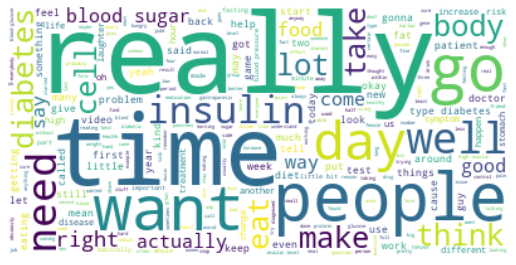

In [12]:
# The type of frequent and infrequent words are the same.
# TODO: Different frequencies of words.
# TODO: For each document, topic that has the highest weight. LDA (prob of video about a topic)
# Pick argmax (all videos with topic 2)
# TODO: Descriptive statisitcs for each class.
# TODO: All variables that Xiao used. Try LASSO.
nu_df = df600[df600["understand"] == 0]
generateWordCloud(nu_df, "subtitle")

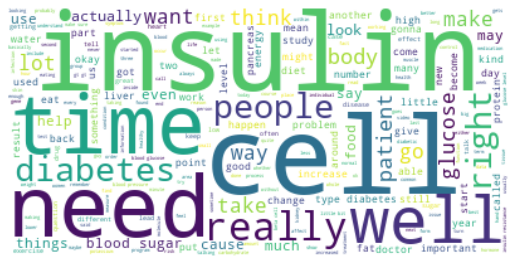

In [18]:
generateWordCloud(df600, "subtitle")

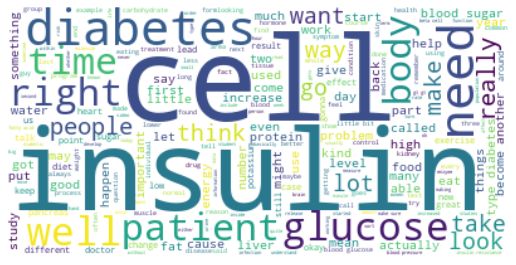

In [14]:
u_df = df600[df600["understand"] == 1]
generateWordCloud(u_df, "subtitle")

In [40]:
from helper_fn import *

In [34]:
truncateColumn(df600, 0, 10, "Kincaid")

In [39]:
df600

,URL,Duration,info,action,understand,ARI,FleshReadingEase,Kincaid,active_verb,has_description,...,topicIds,comment_total_words,postive_comment_count,keyword_title_cosine,comment_description_cosine,comment_unique_words,keyword_decription_cosine,neutral_comment_count,negative_comment_count,comment_title_cosine
0,-32U9eU1hdM,310,1.00,0,1,14.52,28.51,10.00,59.00,1.00,...,NaN,290.00,14.00,0.00,2.53,257.00,0.02,4.00,4.00,0.71
1,-71ld0iqAq8,602,1.00,0,1,9.06,52.87,8.75,31.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
2,-8HmZjScLe0,732,0.00,0,0,21.83,70.67,10.00,42.00,1.00,...,NaN,"3,603.00",90.00,0.28,3.22,"2,789.00",0.00,5.00,5.00,2.46
3,-Aj5BTnz-v0,559,1.00,1,1,15.78,25.99,10.00,23.00,1.00,...,NaN,261.00,9.00,0.28,1.23,234.00,0.02,6.00,3.00,0.45
4,-IaysvX1L8U,246,1.00,0,1,12.51,45.13,10.00,16.00,1.00,...,NaN,104.00,3.00,0.19,0.27,95.00,0.04,1.00,1.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,zLbAxztnnfE,163,0.00,0,0,19.30,19.81,10.00,77.00,1.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
617,zPdwsCTp4gM,751,1.00,0,1,8.49,65.03,7.58,6.00,1.00,...,NaN,70.00,1.00,0.47,0.09,54.00,0.00,0.00,1.00,0.00
618,zU-5GcqzHNM,819,1.00,1,1,16.95,62.72,10.00,17.00,1.00,...,NaN,"5,239.00",47.00,0.07,8.14,"3,715.00",0.14,17.00,36.00,3.46
619,z_3S2_41_FE,300,1.00,0,1,9.27,75.98,7.75,32.00,1.00,...,NaN,"2,684.00",38.00,0.00,8.46,"2,178.00",0.18,33.00,29.00,5.21


<function helper_fn.truncateColumn(df, lower_bound, upper_bound, col_name)>